<a href="https://colab.research.google.com/github/jyang500/cmsc/blob/main/parseCaptcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/captcha1.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/captcha1.zip
replace kaggle/Train/01se.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: kaggle/Train/01se.png   
  inflating: kaggle/Train/03a1.png   
  inflating: kaggle/Train/04r5.png   
  inflating: kaggle/Train/05m4.png   
  inflating: kaggle/Train/0b3b.png   
  inflating: kaggle/Train/0gvf.png   
  inflating: kaggle/Train/0iuj.png   
  inflating: kaggle/Train/0k59.png   
  inflating: kaggle/Train/0lbv.png   
  inflating: kaggle/Train/0tx7.png   
  inflating: kaggle/Train/0uai.png   
  inflating: kaggle/Train/0wlz.png   
  inflating: kaggle/Train/0ws3.png   
  inflating: kaggle/Train/124a.png   
  inflating: kaggle/Train/12t1.png   
  inflating: kaggle/Train/12y1.png   
  inflating: kaggle/Train/18si.png   
  inflating: kaggle/Train/1dhy.png   
  inflating: kaggle/Train/1g53.png   
  inflating: kaggle/Train/1hnq.png   
  inflating: kaggle/Train/1j08.png   
  inflating: kaggle/Train/1lhn.png   
  inflating: kaggle/Train/1odm.

In [ ]:
# file combination code modified from dataset page on kaggle
# https://www.kaggle.com/famadio/ocr-attempt-keras-open-cv
dir = "kaggle"
train_data = []
label = ""
val_data = []
for i in os.listdir(dir):
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        
        count+=1
        if count > 100:
            break
        for x in j:
          if (x == '.'):
            break
          label = label + x
        val_data.append(label)
        label = ""
        img = cv2.imread(os.path.join(sub_directory,j),0)
        train_data.append([img,i])
print(val_data)

['7zax', '0ws3', 'a82l', '0k59', 'j0on', 'bh6r', '2o7w', 'h94e', '03a1', '3w50', 'gym0', 'ka8r', '8kg7', 'fa82', '7v0c', '2a8g', '8c2u', '98dr', '8top', 'hgh5', 'nx4k', 'fav1', '3t73', 'l71n', '2cix', '4xrg', 'ma8a', 'vj9y', '01se', '8wtl', '9x1i', 'jjx3', 'j2j6', '2lfc', 'b5kj', 'j1p5', 'y3pw', 'cjo8', '89at', '6p7b', 'sk0r', 'f6j1', 'hb5j', 'dqq1', '124a', 'd1ag', 'akg7', 'ns91', 'i6lm', 'h5n3', 'yu23', 'gde8', '0uai', '65ya', '5fkv', '8s2c', 'ns7h', 'n7ky', '1hnq', 'abn1', '262b', 'pn99', '0lbv', 'aeg5', 'k931', '1y13', 'vhr6', '0b3b', '6kuf', 'h8je', 'oel8', 'j7no', '70uh', '1odm', '28mj', 'nfj8', '9tft', '8m5c', '9kmq', 'd136', '2m6c', '18si', 'fm8l', 'hlx9', 'b6ii', 'o9q6', 'bjr1', 'gz7y', '4htx', '4v8d', 'b4u1', 'ky76', 'oa21', '7owi', 'bj6n', 'gv8n', '4igu', 'f2e1', '22pq', '7yuf', '7zax', '0ws3', 'a82l', '0k59', 'j0on', 'bh6r', '2o7w', 'h94e', '03a1', '3w50', 'gym0', 'ka8r', '8kg7', 'fa82', '7v0c', '2a8g', '8c2u', '98dr', '8top', 'hgh5', 'nx4k', 'fav1', '3t73', 'l71n', '2cix',

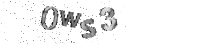

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow( train_data[1][0],)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
len(train_data)

526

In [ ]:
len(val_data)

526

In [ ]:
print(train_data[1])

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'treated_1']


In [ ]:
fileName = "captchatrainSmall.npy"
if os.path.exists(fileName):
    os.remove(fileName)
with open(fileName, "wb") as f:
    np.save(f, train_data)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


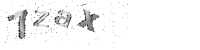

In [ ]:
from google.colab.patches import cv2_imshow
with open(fileName, "rb") as f:
    test = np.load(f, allow_pickle=True)
cv2_imshow(test[0][0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
fileName = "captchavalidSmall.npy"
#Convert into Numpy array, not sure if it works for model
val_data =np.array(val_data)
print(val_data)
if os.path.exists(fileName):
    os.remove(fileName)
with open(fileName, "wb") as f:
    np.save(f, val_data)

['7zax' '0ws3' 'a82l' '0k59' 'j0on' 'bh6r' '2o7w' 'h94e' '03a1' '3w50'
 'gym0' 'ka8r' '8kg7' 'fa82' '7v0c' '2a8g' '8c2u' '98dr' '8top' 'hgh5'
 'nx4k' 'fav1' '3t73' 'l71n' '2cix' '4xrg' 'ma8a' 'vj9y' '01se' '8wtl'
 '9x1i' 'jjx3' 'j2j6' '2lfc' 'b5kj' 'j1p5' 'y3pw' 'cjo8' '89at' '6p7b'
 'sk0r' 'f6j1' 'hb5j' 'dqq1' '124a' 'd1ag' 'akg7' 'ns91' 'i6lm' 'h5n3'
 'yu23' 'gde8' '0uai' '65ya' '5fkv' '8s2c' 'ns7h' 'n7ky' '1hnq' 'abn1'
 '262b' 'pn99' '0lbv' 'aeg5' 'k931' '1y13' 'vhr6' '0b3b' '6kuf' 'h8je'
 'oel8' 'j7no' '70uh' '1odm' '28mj' 'nfj8' '9tft' '8m5c' '9kmq' 'd136'
 '2m6c' '18si' 'fm8l' 'hlx9' 'b6ii' 'o9q6' 'bjr1' 'gz7y' '4htx' '4v8d'
 'b4u1' 'ky76' 'oa21' '7owi' 'bj6n' 'gv8n' '4igu' 'f2e1' '22pq' '7yuf'
 '7zax' '0ws3' 'a82l' '0k59' 'j0on' 'bh6r' '2o7w' 'h94e' '03a1' '3w50'
 'gym0' 'ka8r' '8kg7' 'fa82' '7v0c' '2a8g' '8c2u' '98dr' '8top' 'hgh5'
 'nx4k' 'fav1' '3t73' 'l71n' '2cix' '4xrg' 'ma8a' 'vj9y' '01se' '8wtl'
 '9x1i' 'jjx3' 'j2j6' '2lfc' 'b5kj' 'j1p5' 'y3pw' 'cjo8' '89at' '6p7b'
 'sk0r